<a href="https://colab.research.google.com/github/ferozferoz/DeepLearn/blob/master/basic_cat_non_cat_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import h5py

In [99]:
train_dataset = h5py.File('/content/gdrive/My Drive/ColabNotebooks/basic_cat_non_cat_example/neuralnet_dataset/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/gdrive/My Drive/ColabNotebooks/basic_cat_non_cat_example/neuralnet_dataset/test_catvnoncat.h5', "r")
print("Keys: %s" % train_dataset.keys())
print(train_dataset["train_set_x"])
X = np.array(train_dataset["train_set_x"])
print("X.shape = "+str(X.shape))
y = np.array(train_dataset["list_classes"])
print("Output classes = "+str(y))

Keys: <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
X.shape = (209, 64, 64, 3)
Output classes = [b'non-cat' b'cat']


In [100]:
train_set_X_orig = np.array(train_dataset["train_set_x"]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"]) # your train set labels
test_set_X_orig = np.array(test_dataset["test_set_x"]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"]) # your test set labels

train_set_X_flatten = np.divide(train_set_X_orig,255.0)
test_set_X_flatten = np.divide(test_set_X_orig,255.0)

print("Printing the dimensions of data before Flattening")

print("train_set_X_orig shape = "+ str(train_set_X_orig.shape))
print("train_set_y_orig shape = "+ str(train_set_y_orig.shape))
print("test_set_X_orig shape = " + str(test_set_X_orig.shape))
print("test_set_y_orig shape = " + str(test_set_y_orig.shape))
train_set_X_flatten.shape

Printing the dimensions of data before Flattening
train_set_X_orig shape = (209, 64, 64, 3)
train_set_y_orig shape = (209,)
test_set_X_orig shape = (50, 64, 64, 3)
test_set_y_orig shape = (50,)


(209, 64, 64, 3)

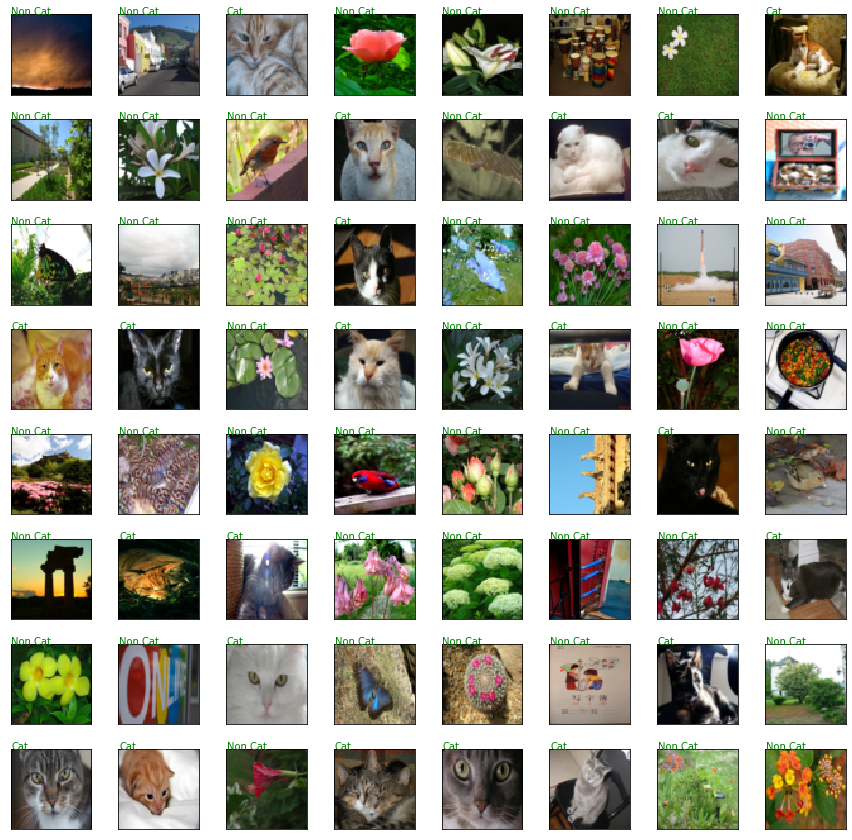

In [101]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(8, 8, figsize=(15,15),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.3, wspace=0.3))
k=0
for i in range(8):
      for j in range(8):
        ax[i,j].imshow(train_set_X_orig[k,], cmap='binary', interpolation='nearest')
        ax[i,j].text(.05,.05, "Cat" if (train_set_y_orig[k] == 1)  else "Non Cat" , color='green')
        k+=1

In [171]:
from keras import layers,models
model = models.Sequential()
# 3 by 3 convolution with 64 filters having relu activation
model.add(layers.Conv2D(128,(3,3), activation = 'relu',input_shape = (64,64,3)))
# 2 by 2 maxpooling 
model.add(layers.MaxPooling2D((2,2)))
# we convert 3 dim vector to one dim array to be fed to fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
# we are returning two clases hence using sigmoid activation and returning single length value
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 128)       0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 123008)            0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               62980608  
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 513       
Total params: 62,984,705
Trainable params: 62,984,705
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop(lr=.001),metrics=['acc'])

In [173]:
history = model.fit(train_set_X_flatten,train_set_y_orig,epochs=20)

Epoch 1/20
209/209 [==============================] - 6s 30ms/step - loss: 12.6876 - acc: 0.5215
Epoch 2/20
209/209 [==============================] - 6s 28ms/step - loss: 0.7506 - acc: 0.6986
Epoch 3/20
209/209 [==============================] - 6s 28ms/step - loss: 0.8243 - acc: 0.6842
Epoch 4/20
209/209 [==============================] - 6s 28ms/step - loss: 0.4302 - acc: 0.7608
Epoch 5/20
209/209 [==============================] - 6s 28ms/step - loss: 0.3415 - acc: 0.8373
Epoch 6/20
209/209 [==============================] - 6s 28ms/step - loss: 0.5519 - acc: 0.7703
Epoch 7/20
209/209 [==============================] - 6s 28ms/step - loss: 0.2313 - acc: 0.9378
Epoch 8/20
209/209 [==============================] - 7s 35ms/step - loss: 0.3218 - acc: 0.8612
Epoch 9/20
209/209 [==============================] - 7s 36ms/step - loss: 0.1484 - acc: 0.9522
Epoch 10/20
209/209 [==============================] - 6s 28ms/step - loss: 0.1791 - acc: 0.9282
Epoch 11/20
209/209 [=================

In [0]:
train_set_prediction_y = model.predict(train_set_X_flatten)
test_set_prediction_y = model.predict(test_set_X_flatten)

In [0]:
train_y_prediction = np.zeros((1, train_set_prediction_y.shape[0]),dtype="int")
test_y_prediction = np.zeros((1, test_set_prediction_y.shape[0]),dtype="int")

for i in range(train_set_prediction_y.shape[0]):
  # Convert probabilities a[0,i] to actual predictions p[0,i]
  ### START CODE HERE ### (≈ 4 lines of code)
  train_y_prediction[0, i] = 1 if train_set_prediction_y[i,0] > 0.5 else 0
  ### END CODE HERE ###

for i in range(test_set_prediction_y.shape[0]):
  test_y_prediction[0, i] = 1 if test_set_prediction_y[i,0] > 0.5 else 0

In [176]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(train_set_y_orig - train_y_prediction)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(test_set_y_orig - test_y_prediction)) * 100))


train accuracy: 100.0 %
test accuracy: 78.0 %


In [154]:
# here is the exact translation of code designed in numpy in previous example in keras library
model_1 = models.Sequential()
# 3 by 3 convolution with 64 filters having relu activation
# we are returning two clases hence using sigmoid activation and returning single length value
model_1.add(layers.Flatten(input_shape = (64,64,3)))
model_1.add(layers.Dense(1,activation = 'sigmoid'))
model_1.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 12289     
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import optimizers
model_1.compile(loss = 'binary_crossentropy', optimizer=optimizers.sgd(learning_rate=.005),metrics=['acc'])

In [0]:
history_1 = model_1.fit(train_set_X_flatten,train_set_y_orig,epochs=300)

In [0]:
train_set_prediction_y_1 = model_1.predict(train_set_X_flatten)
test_set_prediction_y_1 = model_1.predict(test_set_X_flatten)
test_set_prediction_y_1

In [162]:
train_y_prediction_1 = np.zeros((1, train_set_prediction_y_1.shape[0]),dtype="int")
test_y_prediction_1 = np.zeros((1, test_set_prediction_y_1.shape[0]),dtype="int")

for i in range(train_set_prediction_y_1.shape[0]):
  # Convert probabilities a[0,i] to actual predictions p[0,i]
  ### START CODE HERE ### (≈ 4 lines of code)
  train_y_prediction_1[0, i] = 1 if train_set_prediction_y_1[i,0] > 0.5 else 0
  ### END CODE HERE ###

for i in range(test_set_prediction_y_1.shape[0]):
  test_y_prediction_1[0, i] = 1 if test_set_prediction_y_1[i,0] > 0.5 else 0
test_set_y_orig

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0])

In [163]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(train_set_y_orig - train_y_prediction_1)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(test_set_y_orig - test_y_prediction_1)) * 100))

train accuracy: 99.04306220095694 %
test accuracy: 72.0 %
